In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import seaborn as sns; sns.set()
import numpy as np

In [10]:
data = pd.read_csv("winequality-red.csv",delimiter=';')

In [35]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [42]:
X = data.values
labels = data['quality'].values

In [46]:
X = X[:,:-1]

In [47]:
X

array([[  7.4  ,   0.7  ,   0.   , ...,   3.51 ,   0.56 ,   9.4  ],
       [  7.8  ,   0.88 ,   0.   , ...,   3.2  ,   0.68 ,   9.8  ],
       [  7.8  ,   0.76 ,   0.04 , ...,   3.26 ,   0.65 ,   9.8  ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   3.42 ,   0.75 ,  11.   ],
       [  5.9  ,   0.645,   0.12 , ...,   3.57 ,   0.71 ,  10.2  ],
       [  6.   ,   0.31 ,   0.47 , ...,   3.39 ,   0.66 ,  11.   ]])

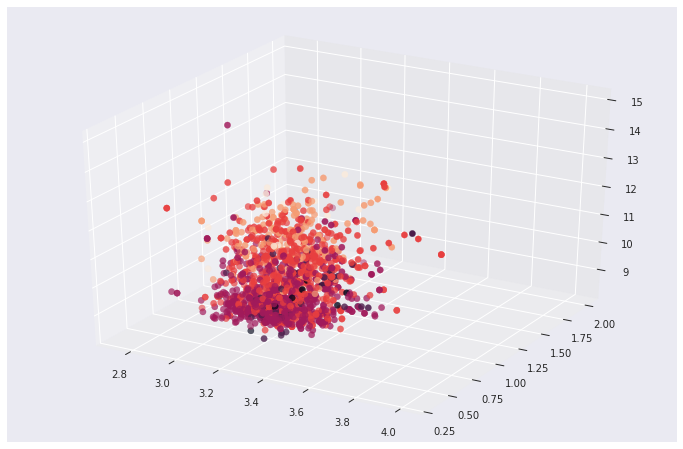

In [37]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], zdir='z',c=labels, s=40)

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/u

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/d

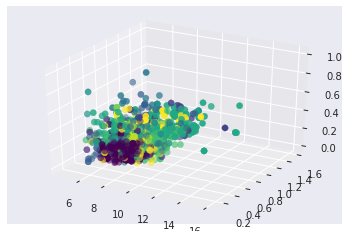

In [48]:
from sklearn.mixture import GMM
gmm = GMM(n_components=11, covariance_type="full").fit(X)
gmmlabels = gmm.predict(X)
fig = plt.figure()
axgmm = fig.add_subplot(111, projection='3d')
axgmm.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c=gmmlabels, s=40, cmap='viridis')

In [49]:
gmmlabels

array([0, 7, 7, ..., 0, 0, 6])

In [50]:
 from sklearn.metrics import f1_score
f1_score(labels, gmmlabels, average='micro') 

0.12132582864290181